In this lab, you are part of an analytics team that provides insights about your company's sales and marketing practices.
The dataset provided includes information about marketing campaigns across TV, radio, and social media, as well as how much revenue in sales was generated from these campaigns. Based on this information, company leaders will make decisions about where to focus future marketing resources. Therefore, it is critical to provide them with a clear understanding of the relationship between types of marketing campaigns and the revenue generated as a result of this investment.

In [3]:
import pandas as pd
import statsmodels.formula.api as ols
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [4]:
file_name = 'marketing_sales_data.csv'

def raw_df(file_name):
    cwd = os.getcwd()
    file_path = os.path.join(cwd,"raw_data",file_name)

    return pd.read_csv(file_path)

mktg_raw = raw_df(file_name)
mktg_raw.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
5,High,25.561910,5.459718,Micro,261.966812
6,High,37.263819,6.886535,Nano,349.861575
7,Low,13.187256,2.766352,Macro,140.415286
8,High,29.520170,2.333157,Nano,264.592233
9,Low,3.773287,0.135074,Nano,55.674214


In [5]:
#Check NAs

print(mktg_raw.isna().sum())
print(mktg_raw.shape)

TV              1
Radio           1
Social Media    0
Influencer      0
Sales           1
dtype: int64
(572, 5)


In [6]:
# Check nulls 
mktg_raw.isnull().sum()

TV              1
Radio           1
Social Media    0
Influencer      0
Sales           1
dtype: int64

In [7]:
mask = (mktg_raw["TV"].isna()) | (mktg_raw["Radio"].isna()) | (mktg_raw["Sales"].isna())
mktg_raw[mask]

,TV,Radio,Social Media,Influencer,Sales
232,NaN,34.111674,4.624148,Nano,342.913372
443,High,36.466753,5.635992,Mega,NaN
510,Low,NaN,4.132526,Macro,78.031498


In [8]:
mktg = mktg_raw.dropna().reset_index(drop=True)
print(mktg.shape)
mktg

(569, 5)


,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
...,...,...,...,...,...
564,High,28.210738,4.373466,Micro,302.887998
565,Medium,23.578661,2.856657,Mega,232.555023
566,Low,9.169824,0.067279,Nano,73.888838
567,Low,11.563403,1.727947,Nano,121.949570


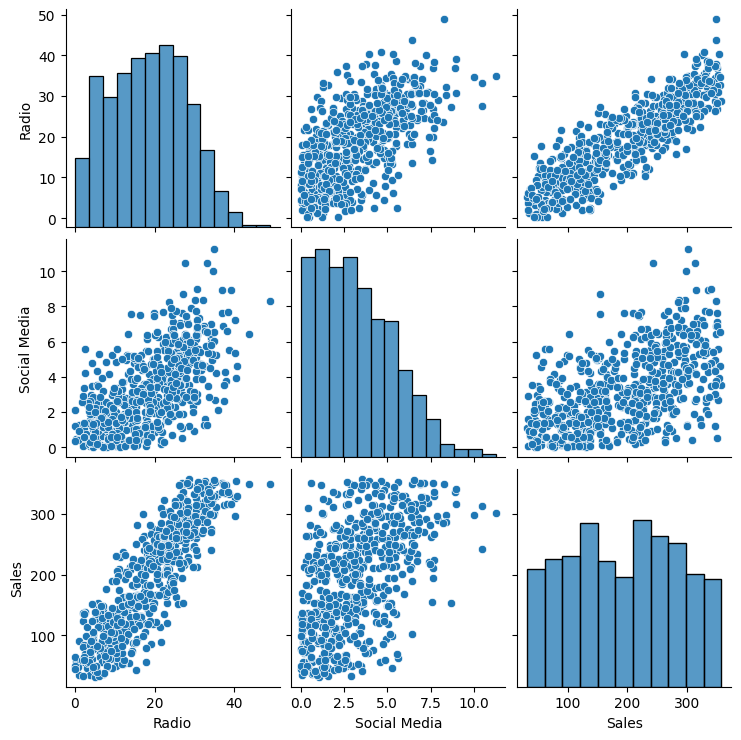

In [9]:
sns.pairplot(mktg)

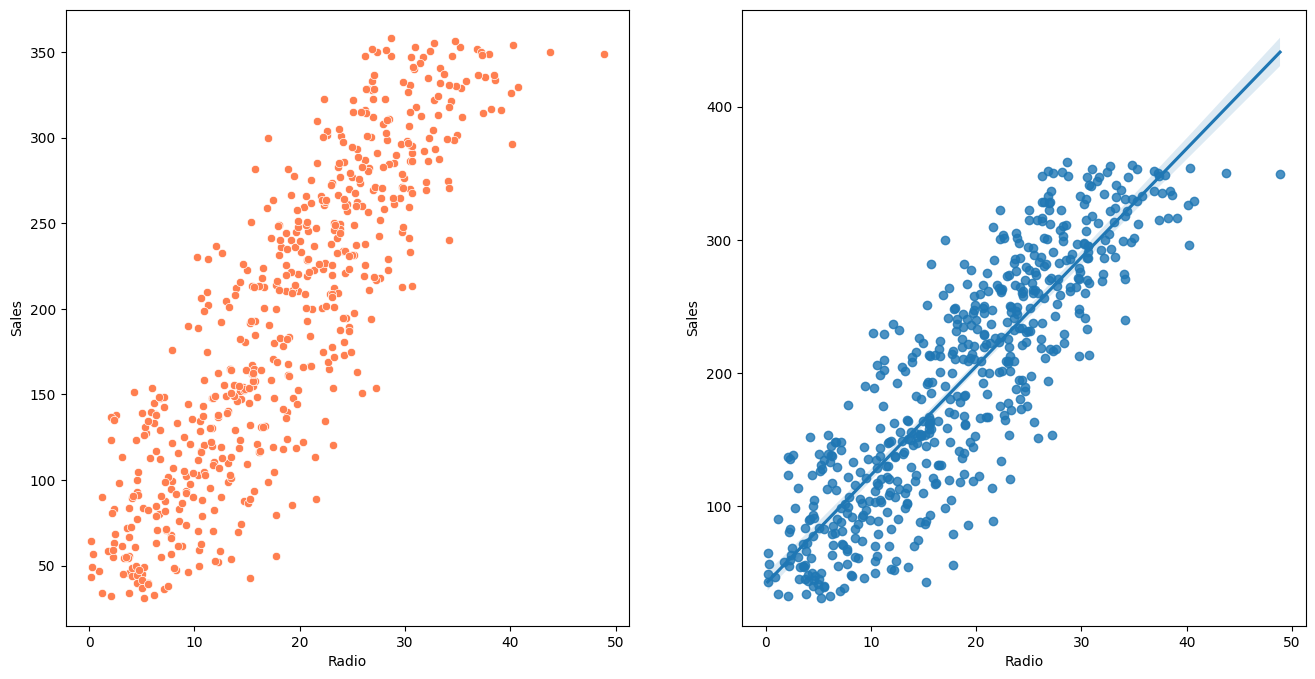

In [10]:
fig, axes = plt.subplots(1,2,figsize=(16,8))

sns.scatterplot(
    data = mktg,
    x="Radio",
    y="Sales",
    color = "Coral",
    ax = axes[0]
)

sns.regplot(
    data = mktg,
    x="Radio",
    y="Sales",
    # color = "Coral",
    ax = axes[1]
)

plt.show()

In [11]:
radio_model = ols.ols(data=mktg,formula="Sales ~ Radio").fit()
radio_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     1768.
Date:                Fri, 14 Nov 2025   Prob (F-statistic):          2.07e-176
Time:                        18:34:53   Log-Likelihood:                -2966.7
No. Observations:                 569   AIC:                             5937.
Df Residuals:                     567   BIC:                             5946.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.5326      4.067     10.211      0.000      33.544      49.521
Radio          8.1733      0.194     42.048      0.000       7.791       8.555
==============================================================================
Omnibus:                        2.267   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                2.221
Skew:                          -0.102   Prob(JB):                        0.329
Kurtosis:                       2.772   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
radio_regression = mktg[["Radio","Sales"]]
radio_regression["prediction"] = radio_model.predict(radio_regression["Radio"])
radio_regression["Residual"] = radio_model.resid
radio_regression

C:\Users\andre\AppData\Local\Temp\ipykernel_14740\744610582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  radio_regression["prediction"] = radio_model.predict(radio_regression["Radio"])
C:\Users\andre\AppData\Local\Temp\ipykernel_14740\744610582.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  radio_regression["Residual"] = radio_model.resid


,Radio,Sales,prediction,Residual
0,1.218354,90.054222,51.490549,38.563673
1,14.949791,222.741668,163.721447,59.020221
2,10.377258,102.774790,126.348847,-23.574057
3,26.469274,328.239378,257.873419,70.365959
4,36.876302,351.807328,342.932984,8.874344
...,...,...,...,...
564,28.210738,302.887998,272.106897,30.781101
565,23.578661,232.555023,234.247630,-1.692607
566,9.169824,73.888838,116.480147,-42.591308
567,11.563403,121.949570,136.043547,-14.093977


<Axes: xlabel='Residual', ylabel='Count'>

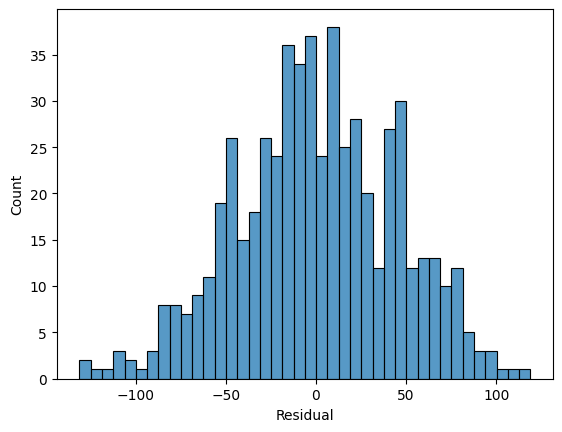

In [13]:
sns.histplot(
    data= radio_regression,
    x="Residual",
    bins=40
)

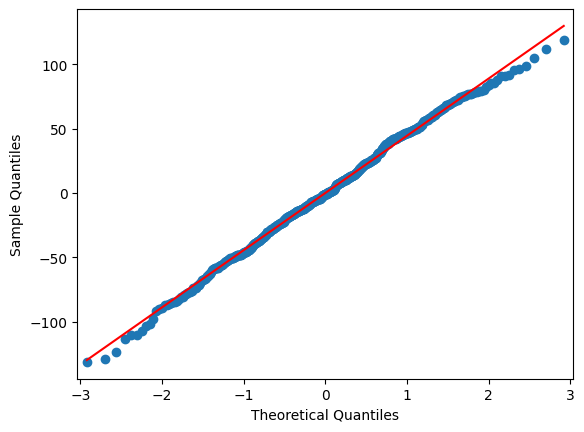

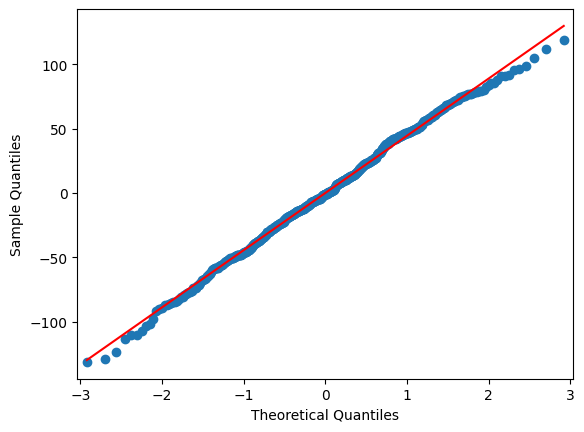

In [16]:
sm.qqplot(
    radio_regression["Residual"],line='s'
)

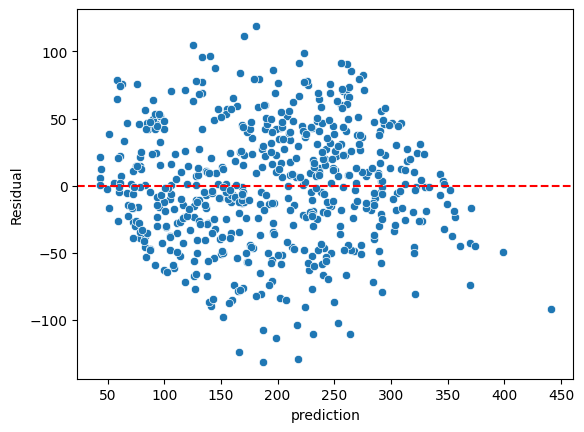

In [ ]:
sns.scatterplot(
    data = radio_regression,
    x = "prediction",
    y = "Residual"
)

plt.axhline(
    y = 0,
    color = 'Red',
    linestyle = "--"
)